# 神经元
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_18_2021_11_01_11_3CIDZe.jpg)

单个神经元的属性有哪些?

### 先加权求和

In [701]:
x1 = 0.1 
x2 = 0.5
x3 = 0.8

In [702]:
# 也可以这样， 一次性赋值
w1, w2, w3 = 2, 1, 0.5

In [703]:
b = 2.5

In [704]:
output = w1 * x1 + w2*x2 + w3*x3 + b

In [705]:
print(output)

3.6


In [706]:
# 简单一点
import numpy as np 

In [707]:
x = np.array([x1, x2, x3])
w = np.array([w1, w2, w3])
print(x)
print(w)

[0.1 0.5 0.8]
[2.  1.  0.5]


In [708]:
output = np.dot(x, w) + b
print(output)

3.6


### 再过激活函数

$\sigma(z) = \frac{1}{1+e^{-z}}$

In [709]:
def sigmoid(z):
    """Sigmoid 激活函数"""
    return 1.0/(1.0+np.exp(-z))

In [710]:
# 画出激活函数的图像
z_s = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

In [711]:
a_s = []

In [712]:
# 取 z_s 里面的每一个数

In [713]:
z_s[0]

-5

In [714]:
# 循环
for z in z_s:
    print(z)

-5
-4
-3
-2
-1
0
1
2
3
4
5


In [715]:
# 循环
for z in z_s:
    a = sigmoid(z)
    print(a)

0.0066928509242848554
0.01798620996209156
0.04742587317756678
0.11920292202211755
0.2689414213699951
0.5
0.7310585786300049
0.8807970779778823
0.9525741268224334
0.9820137900379085
0.9933071490757153


In [716]:
for z in z_s:
    a = sigmoid(z)
    a_s.append(a)

In [717]:
a_s

[0.0066928509242848554,
 0.01798620996209156,
 0.04742587317756678,
 0.11920292202211755,
 0.2689414213699951,
 0.5,
 0.7310585786300049,
 0.8807970779778823,
 0.9525741268224334,
 0.9820137900379085,
 0.9933071490757153]

In [718]:
# 作图

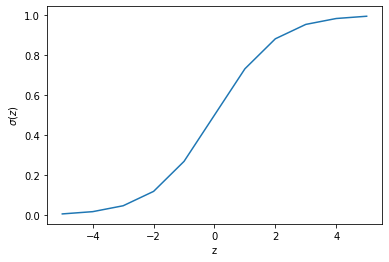

In [719]:
import matplotlib.pyplot as plt 
plt.plot(z_s, a_s)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.show()

In [720]:
# 简化一点: 不用循环

In [721]:
z_s = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

In [722]:
a_s = sigmoid(z_s)

In [723]:
print(a_s, type(a_s))

[0.00669285 0.01798621 0.04742587 0.11920292 0.26894142 0.5
 0.73105858 0.88079708 0.95257413 0.98201379 0.99330715] <class 'numpy.ndarray'>


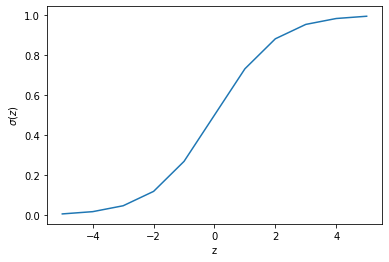

In [724]:
plt.plot(z_s, a_s)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.show()

In [725]:
## 综合一下: 单个神经元的计算
output = np.dot(x, w) + b

In [726]:
output

3.6

In [727]:
output = sigmoid(np.dot(x, w) + b)

In [728]:
print(output)

0.973403006423134


In [729]:
# 面向对象
class neuron:
    def __init__(self, x, w, b):
        self.x = x
        self.w = w
        self.b = b
    
    def out(self):
        return self.activation_f(np.dot(self.w, self.x) + self.b)
    
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))
        

In [730]:
n1 = neuron(x=x, w=w, b=b)

In [731]:
n1.out()

0.973403006423134

# 神经层

<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_20_deep_neural_network_big.png' width='40%'/>
$
\left[\begin{array}{l}a_{10} \\ a_{11} \\ a_{12} \\ a_{13} \\ a_{14} \end{array}\right]= \sigma \left ( \left[\begin{array}{llll}w_{00} & w_{01} & w_{02} & w_{13} \\ w_{10} & w_{11} & w_{12} & w_{13} \\ w_{20} & w_{21} & w_{22} & w_{23} \\ w_{30} & w_{31} & w_{32} & w_{33} \\ w_{40} & w_{41} & w_{42} & w_{43}\end{array}\right]\left[\begin{array}{l}a_{00} \\ a_{01} \\ a_{02} \\ a_{03}\end{array}\right]+\left[\begin{array}{l}b_{10} \\ b_{11} \\ b_{12} \\ b_{13} \\ b_{14}\end{array}\right] \right )
$

一层神经元的属性有哪些?

In [732]:
w = np.array([[1, 2, 1], [2, 2, 2], [1,1,3]])
w

array([[1, 2, 1],
       [2, 2, 2],
       [1, 1, 3]])

In [733]:
a = np.array([[1],[1],[1]])
a

array([[1],
       [1],
       [1]])

In [734]:
np.matmul(w,a)

array([[4],
       [6],
       [5]])

In [735]:
w = np.array([[1, 2, 1], [2, 2, 2], [1,1,3]])
a = np.array([1,1,1])

In [736]:
np.dot(w,a)

array([4, 6, 5])

In [737]:
b = np.array([1,1,2])

In [738]:
out = np.dot(w,a) + b

In [739]:
out

array([5, 7, 7])

In [740]:
sigmoid(out)

array([0.99330715, 0.99908895, 0.99908895])

In [741]:
class layer:
    def __init__(self, x, w, b):
        self.x = x 
        self.w = w 
        self.b = b
    
    def out(self):
        return self.activation_f(np.dot(self.w, self.x) + self.b)
    
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))

In [742]:
a1 = np.array([1,1,1])
w2 = np.array([[1, 2, 1], [2, 2, 2], [1,1,3]])
b2= np.array([1,1,2])

l = layer(x=a1, w=w2, b=b2)

In [743]:
l.out()

array([0.99330715, 0.99908895, 0.99908895])

# 神经网络

In [744]:
class network:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases
    
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))

### 验证是否写正确了

In [745]:
# 输入三个神经元
a0 = np.array([1,1,1])
w1 = np.array([[1, 2, 1], [2, 2, 2], [1,1,3]])
b1= np.array([1,1,2])

In [746]:
# 具体化
l_1 = layer(x=a0, w=w1, b=b1)

In [747]:
# 第一层的输出
a1 = l_1.out()

In [748]:
w2 = np.array([[0.1, 0.2, 1], [2, 0.2, 2], [1,0.1,0.3]])
b2= np.array([1,1,2])

In [749]:
l_2 = layer(x=a1, w=w2, b=b2)

In [750]:
a_2 = l_2.out()

In [751]:
a_2

array([0.90873096, 0.99442909, 0.96748325])

In [752]:
## 用Network类去验证
weights = [w1, w2]
biases = [b1, b2]

In [753]:
nn = network(weights=weights, biases=biases)

In [754]:
x = np.array([1,1,1])
nn.out(x)

array([0.90873096, 0.99442909, 0.96748325])

## 简化
希望可以指定网络结构， 自动生成所有的权重和偏置
<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_17_10_nn_.svg' width='20%'>

In [755]:
sizes = [5, 3, 2]

In [756]:
np.random.normal()

0.5999202962300039

In [757]:
W1 = np.random.normal(size=(3,5))

In [758]:
W1

array([[-1.39549975, -0.92795788,  0.07376076,  1.65908083, -1.10652679],
       [ 0.3627569 , -0.54317273,  0.37047601,  0.08878115,  0.70953594],
       [-0.64447344,  0.30236169, -0.43481349,  1.12385121, -0.91580003]])

In [759]:
W2 = np.random.normal(size=(2,3))

In [760]:
W2

array([[-2.04408796,  0.80600186,  1.10249316],
       [-0.76927821, -1.07147687, -0.49556288]])

In [761]:
weights = [W1, W2]

In [762]:
weights

[array([[-1.39549975, -0.92795788,  0.07376076,  1.65908083, -1.10652679],
        [ 0.3627569 , -0.54317273,  0.37047601,  0.08878115,  0.70953594],
        [-0.64447344,  0.30236169, -0.43481349,  1.12385121, -0.91580003]]),
 array([[-2.04408796,  0.80600186,  1.10249316],
        [-0.76927821, -1.07147687, -0.49556288]])]

In [763]:
num_layers = len(nn_structure)
weights = [np.random.normal(size=(sizes[i], sizes[i-1])) for i in range(1, num_layers)]

In [764]:
weights

[array([[-1.58008881, -0.23404107, -2.59792458,  0.78112962,  0.50303987],
        [-0.20080806,  1.6638996 ,  0.20674371, -1.2565414 ,  1.33473747],
        [ 1.04808933, -0.63398305,  0.62644192, -0.41857878, -1.61709476]]),
 array([[ 0.21994045,  0.98251534,  0.81045966],
        [ 0.90033781, -1.49908724, -0.16850728]])]

In [765]:
biases = [np.random.normal(size=sizes[i]) for i in range(1, num_layers)]

In [766]:
biases

[array([-0.71905099,  0.02738164, -1.77188364]),
 array([-1.55442064, -0.38585721])]

In [767]:
class network:
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))

In [768]:
sizes = [5, 3, 2]

In [769]:
nn = network(sizes = sizes)

In [770]:
nn.weights

[array([[ 0.81168857,  0.8789774 , -0.82311776, -0.72757067, -0.94685564],
        [ 0.04615898, -0.76071546,  0.40890797, -0.18484179, -0.79588408],
        [-0.28047923, -0.49451786,  0.77988204, -1.36560738, -0.91485484]]),
 array([[ 0.53709391, -0.10110505,  1.42976585],
        [-0.93731063, -0.32043833, -0.01933295]])]

In [771]:
nn.biases

[array([-2.2307012 , -1.03551083, -0.84109126]),
 array([-0.66971655,  0.55810564])]

至此神经网络的前向传播过程就完成了， 按照道理来说我们**有合适的weights和biases**就可以帮我们识别手写字符了。 

# 识别数字
我们先假设有这些合适的weights和biases。

In [772]:
## 准备网络
# 具体化我们手写字符识别要用到的网络
net = network(sizes = [784, 30, 10])
# net.sizes
# net.num_layers
# net.biases
# net.weights

In [773]:
# out = net.out(x)

In [774]:
# 加载数据 得到一张图片的数据
import gzip
f = gzip.open('mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
f.close()

In [775]:
# training_data
# type(training_data)
training_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [776]:
training_data[1]

array([5, 0, 4, ..., 8, 4, 8])

In [777]:
xs, ys  = training_data[0], training_data[1]

In [778]:
xs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [779]:
ys

array([5, 0, 4, ..., 8, 4, 8])

In [780]:
def one_hot(ys):
    b = np.zeros((ys.size, ys.max()+1))
    b[np.arange(ys.size),ys] = 1
    return b 

In [781]:
ys =  one_hot(ys = ys)

In [782]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [783]:
xs_test, ys_test  = test_data[0], one_hot(ys=test_data[1])

In [784]:
xs_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [785]:
ys_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

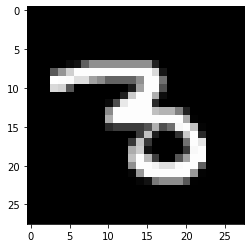

In [786]:
i = 30
x = training_data[0][i]
# # 可视化这张图。是二维的，因此要重新排列数据
plt.imshow(x.reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [787]:
out = net.out(x)

In [788]:
out

array([6.61273398e-01, 9.48326017e-01, 3.62091620e-03, 2.24482554e-02,
       9.99505501e-01, 4.07191994e-04, 1.01374094e-01, 7.00453834e-01,
       1.69514906e-01, 9.29952462e-01])

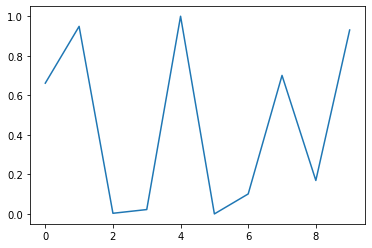

使用随机参数， 识别出的数字是: 4


In [789]:
plt.plot(out)
plt.show()
print('使用随机参数， 识别出的数字是: {}'.format(np.argmax(out)))

不对的原因是我们的权重和偏置是随机的， 接下来我们从某个地方拿到这组参数。

In [790]:
import pickle
with open('nn_model_weights.dat', "rb") as f:
    good_weights = pickle.load(f)

with open('nn_model_biases.dat', "rb") as f:
    Bs = pickle.load(f)
    good_biases = [B.flatten() for B in Bs]

In [791]:
len(good_weights)

2

In [792]:
good_weights[0].shape

(30, 784)

In [793]:
len(good_biases)

2

In [794]:
good_biases[0].shape

(30,)

In [795]:
len(net.weights)

2

In [796]:
net.weights[0].shape

(30, 784)

In [797]:
len(net.biases)

2

In [798]:
# 用最优的权重和偏置取替换掉原本随机的值
net.weights = good_weights
net.biases = good_biases

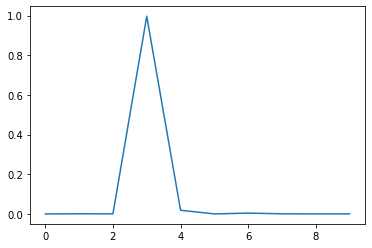

使用较好参数后， 识别出的数字是: 3


In [799]:
out = net.out(x)
plt.plot(out)
plt.show()
print('使用较好参数后， 识别出的数字是: {}'.format(np.argmax(out)))

## 计算准确度( Accuracy)

$$
\text{acc} = \frac{\text{预测正确的图片数目}}{\text{预测图片数目}}
$$

In [800]:
class network:
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # 计算准确度， 其中标签ys是one-hot格式
    def acc(self, xs, ys):
        num = xs.shape[0]
        outs = [np.argmax(self.out(x)) for x in xs]
        ys = [np.argmax(y) for y in ys]
        correct_num = sum(int(out == y) for out, y in zip(outs, ys))
        acc = correct_num / num
        return acc

In [801]:
net = network(sizes = [784, 30, 10])

In [802]:
# 随机参数时的准确度
net.acc(xs=xs_test, ys=ys_test)

0.1192

In [803]:
net.weights = good_weights
net.biases = good_biases

In [804]:
# 较优参数时的准确度
net.acc(xs=xs_test, ys=ys_test)

0.9379

# 找出这组好的参数
定义了一个损失函数:
$$
C(w, b) \equiv \frac{1}{n} \sum_{x} C_{x} = \frac{1}{2 n} \sum_{x}\|y(x)-a_{w,b}(x)\|^{2}
$$
我们的目的是找到这些好的参数, 满足:

$$
w^{*}, b^{*}=\arg \min _{w, b} C(w,b)
$$

<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_17_15_grediant.png' width = '50%'/>

寻找的这些参数的方法是梯度下降, $v$是由所有的权重和偏置构成的一个高维的向量， 其改变的反向就是损失函数梯度下降的方向。

$$
v \rightarrow v^{\prime}=v-\eta \nabla C
$$

具体到其中的某一个分量的更新方法是,

$$
w_{k} \rightarrow w_{k}^{\prime}=w_{k}-\eta \frac{\partial C}{\partial w_{k}}
$$

$$
b_{l} \rightarrow b_{l}^{\prime}=b_{l}-\eta \frac{\partial C}{\partial b_{l}}
$$

- 随机初始化神经网络的权重和偏置之后， 相当于小球在损失函数平面上的任意位置， 假设就是上图中的初始位置A。
- 我们加载一组比较好的权重和偏置之后， 相当于小球在损失函数平面上较低的位置， 假设就是上图中的最佳位置B。
- 机器学习就是从A走到B的这么一个过程。

## 损失函数

In [805]:
class network:
    def __init__(self, sizes):
        self.sizes = sizes
        self.num_layers = len(self.sizes)
        self.weights = [np.random.normal(size=(self.sizes[i], self.sizes[i-1])) for i in range(1, self.num_layers)]
        self.biases = [np.random.normal(size=self.sizes[i]) for i in range(1, self.num_layers)]
    
    # 前向传播
    def out(self, a):
        for w, b in zip(self.weights, self.biases):
            a = self.activation_f(np.dot(w, a) + b)
        return a
    
    # 激活函数
    def activation_f(self, z):
        return 1.0/(1.0+np.exp(-z))
    
    # 准确度， 其中标签ys是one-hot格式
    def acc(self, xs, ys):
        num = xs.shape[0]
        outs = [np.argmax(self.out(x)) for x in xs]
        ys = [np.argmax(y) for y in ys]
        correct_num = sum(int(out == y) for out, y in zip(outs, ys))
        acc = correct_num / num
        return acc
    
    # 损失函数
    def loss(self, xs, ys):
        num_samples = len(xs)
        loss = 0
        for x, y in zip(xs, ys):
            out = self.out(x)
            v = y - out 
            loss = loss + v.dot(v)
        loss = loss / (2*num_samples)
        return loss

In [807]:
net = network(sizes = [784, 30, 10])

In [808]:
# 计算随机参数时的损失函数

In [809]:
loss = net.loss(xs=xs, ys=ys)

In [810]:
loss

1.8878721876288982

In [811]:
# 计算较优参数时的损失函数

In [812]:
net.weights = good_weights
net.biases = good_biases

In [813]:
loss = net.loss(xs=xs, ys=ys)

In [814]:
loss

0.043179193159426

## 更新参数
$$
w_{k} \rightarrow w_{k}^{\prime}=w_{k}-\eta \frac{\partial C}{\partial w_{k}}
$$

$$
b_{l} \rightarrow b_{l}^{\prime}=b_{l}-\eta \frac{\partial C}{\partial b_{l}}
$$